In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [73]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train,test = train_test_split(data,test_size=0.1,random_state=0)

In [187]:
def encodage(df):
    df.Embarked = df['Embarked'].astype('category').cat.codes
    df.Sex = df['Sex'].astype('category').cat.codes
    return df

In [97]:
def imputation(df):
    df=df.drop(['Ticket','Cabin','PassengerId','Name','SibSp','Embarked','Parch'],axis=1)
    df=df.dropna(axis=0)
    return df

In [188]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    X = df.drop(['Survived'],axis=1)
    Y = df['Survived']
    return X,Y

In [98]:
x_train, y_train = preprocessing(train)

In [106]:
x_test, y_test = preprocessing(test)

In [153]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

logistique = LogisticRegression()
ada = AdaBoostClassifier()


In [154]:
list_of_models = {'logistique':logistique,
                  'ada':ada}

In [110]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [143]:
def evaluation(model):
    model.fit(x_train, y_train)
    #ypred=model.predict(x_test)
    N, train_score, val_score = learning_curve(model,x_train,y_train, cv=4, scoring='f1')
    ypred=model.predict(x_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='val score')
    plt.legend()

logistique
[[30  9]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.75      0.84      0.79        32

    accuracy                           0.80        71
   macro avg       0.80      0.81      0.80        71
weighted avg       0.81      0.80      0.80        71

ada
[[28 11]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        39
           1       0.71      0.84      0.77        32

    accuracy                           0.77        71
   macro avg       0.78      0.78      0.77        71
weighted avg       0.79      0.77      0.77        71



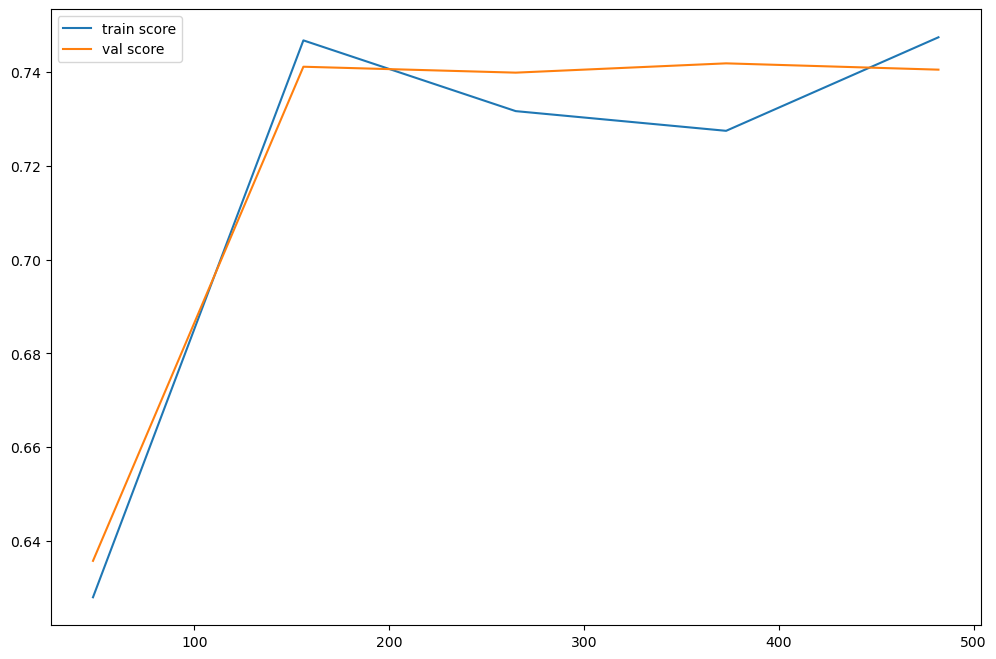

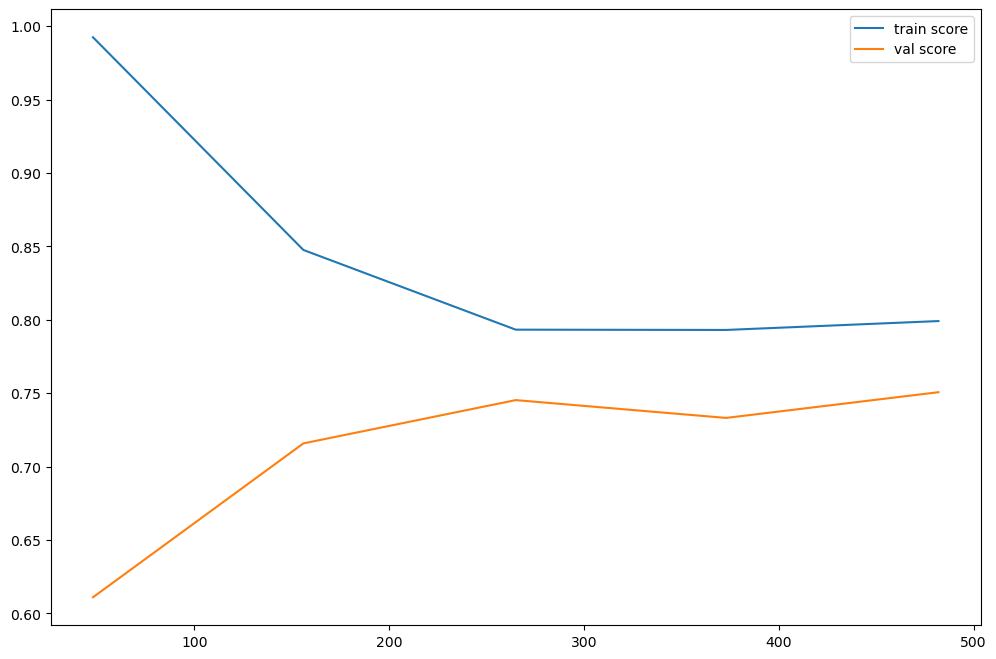

In [155]:
for name,model in list_of_models.items():
    print(name)
    evaluation(model)

<AxesSubplot:>

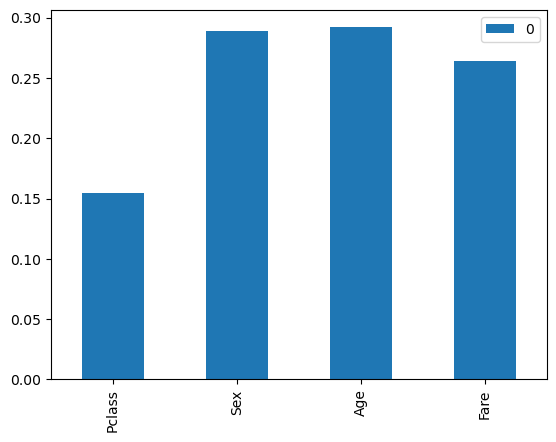

In [115]:
pd.DataFrame(model.feature_importances_,index=x_train.columns).plot.bar()

In [156]:
from sklearn.model_selection import GridSearchCV

In [167]:
# Amélioer ada et logistique
hyper_param = {'n_estimators':[10,30,50,60,40,35,31]}

In [179]:
hyper_param_ = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'penalty':['l2'],
                'C':[100, 10, 1.0, 0.1, 0.01]}

In [207]:
def best_hyper(model,hyper_p):
    grid = GridSearchCV(model,hyper_p,cv=4,scoring='recall')
    grid.fit(x_train,y_train)
    print(grid.best_params_)
    y_pred = grid.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return grid

In [209]:
grid=best_hyper(ada,hyper_param)

{'n_estimators': 35}
[[28 11]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        39
           1       0.72      0.88      0.79        32

    accuracy                           0.79        71
   macro avg       0.80      0.80      0.79        71
weighted avg       0.80      0.79      0.79        71



In [180]:
best_hyper(logistique,hyper_param_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
[[30  9]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.75      0.84      0.79        32

    accuracy                           0.80        71
   macro avg       0.80      0.81      0.80        71
weighted avg       0.81      0.80      0.80        71



In [246]:
final_test = pd.read_csv("test.csv")
final_test.shape

(418, 11)

In [257]:
final_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [247]:
def encodage(df):
    df.Embarked = df['Embarked'].astype('category').cat.codes
    df.Sex = df['Sex'].astype('category').cat.codes
    return df

In [263]:
def imputation(df):
    df=df.drop(['Ticket','Cabin','Name','SibSp','Embarked','Parch'],axis=1)
    df=df.fillna(25)    
    return df

In [196]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)
    X = df.drop(['PassengerId'],axis=1)
    Y = df['PassengerId']
    return X,Y

In [264]:
x__test , y__pass = preprocessing(final_test)

In [265]:
x__test.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [266]:
y_pred = grid.predict(x__test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [267]:
final_data_frame = pd.DataFrame()
Survived = pd.Series(y_pred,index=y__pass.index)
final_data_frame["PassengerId"]=y__pass
final_data_frame["Survived"]=Survived

In [268]:
final_data_frame.to_csv('titanic_prediction.csv',index=False)

In [270]:
final_data_frame.Survived.value_counts()

0    267
1    151
Name: Survived, dtype: int64